<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2002%20-%20Higher%20Order%20Methods/203_3rd%20Order%20Taylor%20Supplementary%20Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supplementary Examples - 3rd Order Taylor Method

This notebook illustrates the 3rd order Taylor method using the initial value problem
 \begin{equation} y^{'}=t-y, \ \ (1 \leq t \leq 3),  \end{equation}
with the initial condition
 \begin{equation}y(1)=\frac{2}{e} \end{equation}



### 3rd Order Taylor:
The general form of the 3rd order Taylor is:
 \begin{equation} w_{i+1}=w_i+h\left[f(t_i,w_i)+\frac{h}{2}f'(t_i,w_i)+\frac{h^2}{6}f''(t_i,w_i)\right] \end{equation}

## Read in Libraries 

In [2]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
import pandas as pd
warnings.filterwarnings("ignore")


## Setting up the discrete time axis
 \begin{equation} h=\frac{t_{end}-t_{start}}{N},  \end{equation}
 \begin{equation} h=\frac{3-1}{10}=0.2, \end{equation}
 \begin{equation}t_i=t_0+ih, \end{equation}
 \begin{equation}t_i=0+0.2i, \end{equation}
for $i=0,1,2,...,5.$

Text(0.5, 1.0, 'Illustration of discrete time points for h=0.2')

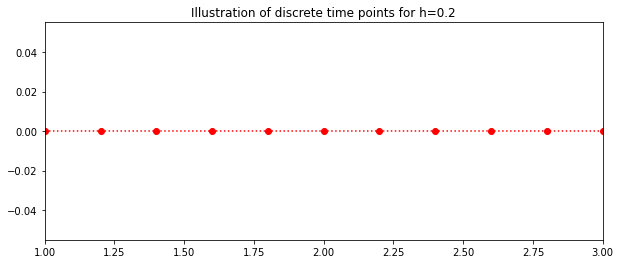

In [3]:
N=10
t_end=3.0
t_start=1.0
h=((t_end-t_start)/N)

IC=2/np.exp(1)
t=np.arange(t_start,t_end+h/2,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.xlim((1,3))
plt.title('Illustration of discrete time points for h=%s'%(h))

## Specific 3rd Order Taylor
To write the specific difference equation for the intial value problem we need derive $f$, $f'$ and $f''$,

 \begin{equation}f(t,y)=t-y, \end{equation}


In [4]:
def myfun(t,w):
    ftw=t-w
    return ftw

 \begin{equation}f'(t,y)=1-y'=1-t+y, \end{equation}

In [5]:
def myfund(t,w):
    ftw=1-t+w
    return ftw

 \begin{equation}f''(t,y)=-1+y'=-1+t-y \end{equation}

In [6]:
def myfundd(t,w):
    ftw=-1+t-w
    return ftw

### Specific Difference equation
This gives the difference equation
 \begin{equation} w_{i+1}= w_{i} + h(t_i-w_i+\frac{h}{2}(1-t_i+w_i)+\frac{h^2}{6}(-1+t_i-w_i)). \end{equation}


## Method

In [7]:
Taylor=np.zeros(N+1)
Taylor[0]=IC
y=(2)*np.exp(-t)+t-1
for i in range (0,N):
    Taylor[i+1]=Taylor[i]+h*(myfun(t[i],Taylor[i])+h/2*myfund(t[i],Taylor[i])+h*h/6*myfundd(t[i],Taylor[i]))

## Results

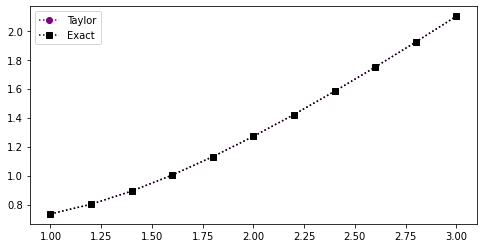

In [8]:
fig = plt.figure(figsize=(8,4))
plt.plot(t,Taylor,'o:',color='purple',label='Taylor')
plt.plot(t,y,'s:',color='black',label='Exact')
plt.legend(loc='best')

## Table

In [9]:

d = {'time t_i': t[0:10],    'Taulor (w_i) ':Taylor[0:10],'Exact (y)':y[0:10],'Exact Error (|y-w|)':np.abs(np.round(y[0:10]-Taylor[0:10],5))}
df = pd.DataFrame(data=d)
df

,time t_i,Taulor (w_i),Exact (y),Exact Error (|y-w|)
0,1.0,0.735759,0.735759,0.00000
1,1.2,0.802341,0.802388,0.00005
2,1.4,0.893117,0.893194,0.00008
3,1.6,1.003698,1.003793,0.00009
4,1.8,1.130494,1.130598,0.00010
5,2.0,1.270565,1.270671,0.00011
6,2.2,1.421502,1.421606,0.00010
7,2.4,1.581337,1.581436,0.00010
8,2.6,1.748454,1.748547,0.00009
9,2.8,1.921534,1.921620,0.00009
